# Examples using the ```mBLLL()``` class


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## create some network

First I want to  create some sort of quick SBM network for the example.

/Users/Gneiss/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


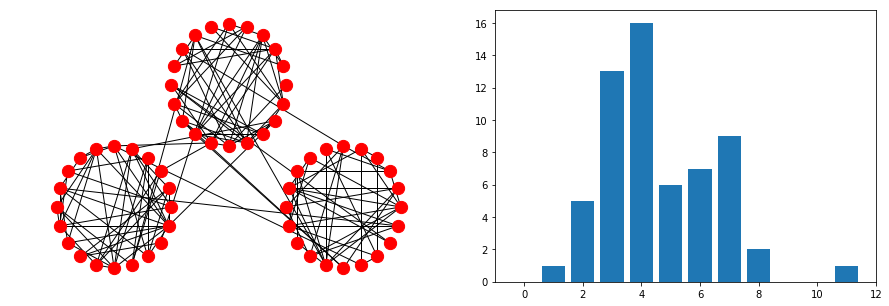

In [2]:
szes=np.array([20,20,20])
#create p matrix with expected 4 intraclass connections per node, 4 expected connections between classes
pmat=[[4/szes[i]  if i==j else 4/szes[i]/szes[j] for i in range(3)] for j in range(3)]

g1 = nx.stochastic_block_model(sizes=szes, p=pmat)
lay1 = nx.circular_layout([i for i in range(20)], center=np.array([0,0]))
lay2 = nx.circular_layout([i for i in range(20,40)], center=np.array([2,2]))
lay3 = nx.circular_layout([i for i in range(40,60)], center=np.array([4,0]))
lay = {**lay1, **lay2, **lay3}
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nx.draw(g1, pos=lay, node_size=150)
plt.subplot(1,2,2)
plt.bar(np.arange(0,len(nx.degree_histogram(g1))), nx.degree_histogram(g1))
plt.show()

## Using the ```mBLLL()``` class:

### import the class from the file mBLLL.py

In [3]:
from mBLLL import *

### initialize with chosen positions and coverage range

We instantiate the mBLLL algo, by feeding it the network ```g1```, specifying two starting positions for the agents, and specifying the coverage ranges. In this case, we specify that the cover ranges is meant to be a constant and not the parameter of a poisson distribution.

In [4]:
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")

### List the attributes

In [5]:
my_algo.__dict__

{'n_agents': 2,
 'network_nx': <networkx.classes.graph.Graph at 0x11ed66390>,
 'n_nodes': 60,
 'random_state': 42,
 'agents_pos': [array([2, 3])],
 'cover_ranges': [1, 1],
 'coverages': [array([ 2, 14, 16, 34]), array([ 3,  8, 15, 16, 17])],
 'potentials': [8]}

### Access the attributes:

In [6]:
my_algo.agents_pos

[array([2, 3])]

In [7]:
my_algo.potentials

[8]

### Make one cycle of the mBLLL algo, "step by step".

One cycle of the mBLLL algo is in two phases, after (possibly randomly) selecting an agent:  
1. the (attempted) movement of the agent, by calling ```.step()``` method.  
2. the (attempted) infection of neighbors, by calling ```.infect()``` method.  

We start with the movement:

In [8]:
my_algo.step(agent=0)

We can see the new position of the agents added to the list:

In [9]:
my_algo.agents_pos

[array([2, 3]), array([34,  3])]

We then attempt infection:

In [10]:
my_algo.infect(agent=0, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

We can now see the new positions of the new agents:

In [11]:
my_algo.n_agents

5

In [12]:
my_algo.agents_pos

[array([2, 3]), array([34,  3, 34, 35, 30])]

After a cycle is completed, we need to add the new potential to the list of potentials:

In [13]:
my_algo.add_potentials()

In [14]:
my_algo.potentials

[8, 20]

### Make one cycle of the mBLLL algo all at once.

These two phases are executed at once by the ```.run_mBLLL()``` method.

In [15]:
#instantiate algo
my_algo = mBLLL(starting_positions=np.array([2,3]), network_nx=g1, cover_ranges=1, cover_ranges_distr="const")
#run 1 cycle
my_algo.run_mBLLL(t_steps=1, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

Let's access attributes:

In [17]:
my_algo.n_agents

6

In [18]:
my_algo.agents_pos

[array([2, 3]), array([14,  3,  2,  4, 11, 15])]

In [16]:
my_algo.potentials

[8, 18]

### Run 100 steps:

In [19]:
my_algo.run_mBLLL(t_steps=100, prob=0.2, cover_ranges=1, cover_ranges_distr="const")

Text(0, 0.5, 'potential')

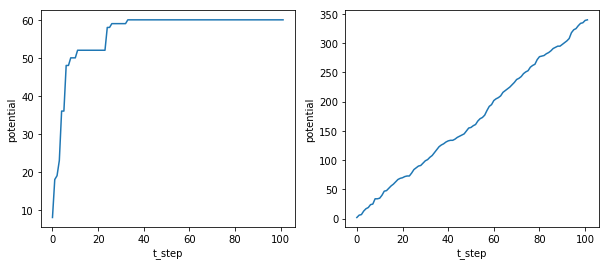

In [26]:
plt.figure(figsize=(10,4))
#plot potentials
plt.subplot(1,2,1)
plt.plot(my_algo.potentials)
plt.xlabel("t_step")
plt.ylabel("potential")
#plot n_agents
plt.subplot(1,2,2)
plt.plot([pos.size for pos in my_algo.agents_pos])
plt.xlabel("t_step")
plt.ylabel("n_agents")



### see last positions of agents

In [40]:
my_algo.agents_pos[-1]

array([11, 15, 34, 38, 11, 15,  2,  8, 11,  0,  9,  1, 19, 34, 32, 20, 30,
       27, 17, 21, 16, 33, 29, 54, 19,  5,  6,  9, 11,  9, 13, 15,  1, 36,
        0, 27, 39, 23, 27, 30,  1,  6,  9, 12, 18, 12, 17, 25, 11, 12, 17,
       15,  4, 19, 14,  5, 13,  1, 18,  2, 32, 35, 39,  1, 14, 15, 38, 12,
       17, 21, 18, 19,  2, 54, 41, 28, 48, 49, 19,  4,  5, 15, 17, 38, 49,
       49, 57,  4, 13, 17,  9,  2, 14, 10, 34, 55, 36, 29, 54,  4,  6,  2,
       11, 17, 34, 57, 46, 51, 33, 32, 36, 22, 24, 14,  0,  8, 59, 19, 22,
       33, 26, 28, 29, 33, 28, 36, 20, 20,  1,  3, 19,  7, 10, 35, 17, 19,
       14,  4, 15,  4, 11, 16, 27, 55, 49,  9,  7, 11, 12, 17,  0,  6,  8,
        9, 19, 14, 34, 36, 45,  5, 12, 21, 16, 38, 21, 29, 54, 39, 23, 27,
       28, 49, 51, 38,  4, 19, 35,  5,  6,  9, 11, 12, 15, 17, 38,  6,  5,
        7, 16, 12, 15, 19, 38, 28, 31,  1, 34, 11, 12, 13, 15, 17, 35, 22,
       23, 34, 35, 13, 14, 17, 49, 40, 41, 43, 54, 58,  3, 12, 19,  4, 19,
       36, 32, 38, 23, 33

### get coverage of an agent in position 18

In [28]:
my_algo.get_coverage(agent_position=18, network_nx=my_algo.network_nx, cover_range=1)

array([18, 13, 25])

### save data

In [32]:
my_algo.save_pickle("./demo_results.p")

### load data

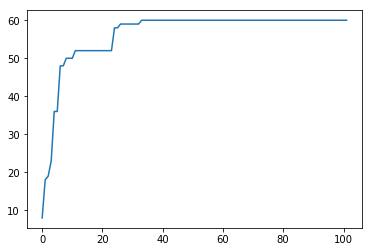

In [36]:
demo_results = pickle.load(open("./demo_results.p", "rb"))
plt.plot(demo_results.potentials)

### more help

Access help pages of specific methods of the mBLLL class:

In [37]:
help(mBLLL.run_mBLLL) #man page of the method BLLL.run()

Help on function run_mBLLL in module mBLLL:

run_mBLLL(self, t_steps=100, temperature=1, prob=0.5, cover_ranges=2, cover_ranges_distr='const')
    Method to run t_steps of the mBLLL algo.
    
    Run the mBLLL algo for t_steps.
    
    Args:
        t_steps (int): number of steps for the simulation.
        temperature (float): temperature of the simulation (see ref).
        prob (float): probability of a covered node to be infected
        cover_ranges (int): cover range of the new agents. depending on cover_ranges_distr, either will be the cover ranges or the new agents, or a parameter for a distribution from which the new cover ranges will be sampled
        cover_ranges_distr (str): if "const", all new agents have cover range equal to cover_ranges. if "poisson", cover ranges for each new agent are sampled from a poisson distribution with rate=cover_ranges 
        
    Returns:
        nothing



Access full help page of the class:

In [38]:
help(mBLLL) #complete man page of the class BLLL

Help on class mBLLL in module mBLLL:

class mBLLL(builtins.object)
 |  Template class for mBLLL algo, a modification of: 
 |  Yazıcıoğlu, A.Y., Egerstedt, M., and Shamma, J.S. (2013). A Game Theoretic Approach to Distributed Coverage of Graphs by Heterogeneous Mobile Agents. IFAC Proceedings Volumes 46, 309–315.
 |  
 |  Attributes:
 |      agents_pos (list[numpy.array]): list of 1d-arrays of agent positions (matrix indices), of size (n_agents)
 |      potentials (list[int]): list of potentials 
 |      
 |  Parameters:
 |      n_agents (int): number of agents. Corrected to number size of starting_positions if starting_positions is specified.
 |      starting_positions (np.array): 1-d array of starting positions. 
 |          If None, starting positions are selected at random. 
 |      cover_ranges (int or list): cover range of the agents. either an int to be applied to all agent, 
 |          or a list of ints representing the cover ranges for each agent
 |      cover_ranges_distr (st